<a href="https://colab.research.google.com/github/naokityokoyama/Projeto_extra/blob/main/Caso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

In [241]:
data = pd.read_csv('https://raw.githubusercontent.com/naokityokoyama/Projeto_extra/main/data_comexstat.csv', encoding='latin1')

In [242]:
data.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     117965 non-null  object 
 1   product  117965 non-null  object 
 2   state    117965 non-null  object 
 3   country  117965 non-null  object 
 4   type     117965 non-null  object 
 5   route    117965 non-null  object 
 6   tons     117965 non-null  float64
 7   usd      117965 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [247]:
data['date'] = pd.to_datetime(data['date'])

## 1 - Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’;

In [248]:
data['product'].unique()

array(['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'], dtype=object)

In [249]:
#dataset apenas com dados Exportação
data_exp = data[data['type']=='Export']

In [250]:
data_soybeans = data_exp[(data_exp['product']=='soybeans')] 
data_soybean_meal = data_exp[(data_exp['product']=='soybean_meal')] 
data_soybean_oil = data_exp[(data_exp['product']=='soybean_oil')] 


In [251]:
data_soybeans[data_soybeans['date']<'1997-12-31']

,date,product,state,country,type,route,tons,usd
73,1997-01-01,soybeans,GO,Spain,Export,Sea,13730.00,3954240.0
74,1997-01-01,soybeans,MT,Bolivia,Export,Other,100.00,60500.0
75,1997-01-01,soybeans,RS,Argentina,Export,Ground,200.00,104000.0
167,1997-02-01,soybeans,GO,Netherlands,Export,Sea,3000.00,855450.0
168,1997-02-01,soybeans,MT,Netherlands,Export,Sea,5000.00,1436185.0
...,...,...,...,...,...,...,...,...
1923,1997-11-01,soybeans,PR,Paraguay,Export,Ground,235.50,110589.0
1925,1997-11-01,soybeans,RS,Uruguay,Export,Ground,114.15,70773.0
2030,1997-12-01,soybeans,GO,Cuba,Export,Sea,210.00,93448.0
2031,1997-12-01,soybeans,MT,Bolivia,Export,Ground,54.00,24840.0


In [ ]:
data_soybeans.groupby(data_soybeans['date'].dt.year).sum()['tons']

In [253]:
# Exportação do mensal soybeans, soybean oil and soybean meal;
trace1 = go.Scatter(x = data_soybeans['date'],
                    y = data_soybeans['tons'],
                    mode = 'lines',
                    name = 'soybeans')
# Gráfico de apenas linhas
trace2 = go.Scatter(x = data_soybean_meal['date'],
                    y = data_soybean_meal['tons'],
                    mode = 'lines',
                    name = 'soybean_meal')
# Criando gráfico com marcadores e linhas
trace3 = go.Scatter(x = data_soybean_oil['date'],
                    y = data_soybean_oil['tons'],
                    mode = 'lines',
                    name = 'soybean_oil')
layout = go.Layout(title = 'Exportação Mensal de 1997 a 2019')
data = [trace1, trace2, trace3]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [254]:
data_soybeans.groupby(data_soybeans['date'].dt.year).sum()['tons']
data_soybean_meal.groupby(data_soybean_meal['date'].dt.year).sum()['tons']
data_soybean_oil.groupby(data_soybean_oil['date'].dt.year).sum()['tons']

date
1997    1117451.178
1998    1300080.071
1999    1501525.634
2000    1060952.727
2001    1540760.712
2002    1848337.887
2003    2381000.412
2004    2498384.984
2005    2667365.968
2006    2407099.279
2007    2341277.589
2008    2314671.303
2009    1587745.986
2010    1559768.212
2011    1736493.140
2012    1753823.323
2013    1359555.904
2014    1303600.346
2015    1669874.182
2016    1253542.300
2017    1342365.392
2018    1414356.108
2019    1031289.620
Name: tons, dtype: float64

In [255]:
# Exportação do anual soybeans, soybean oil and soybean meal;
trace1 = go.Scatter(x = data_soybeans.groupby(data_soybeans['date'].dt.year).sum()['tons'].index,
                    y = data_soybeans.groupby(data_soybeans['date'].dt.year).sum()['tons'].values,
                    mode = 'markers+lines',
                    name = 'soybeans')
# Gráfico de apenas linhas
trace2 = go.Scatter(x = data_soybean_meal.groupby(data_soybean_meal['date'].dt.year).sum()['tons'].index,
                    y = data_soybean_meal.groupby(data_soybean_meal['date'].dt.year).sum()['tons'].values,
                    mode = 'markers+lines',
                    name = 'soybean_meal')
# Criando gráfico com marcadores e linhas
trace3 = go.Scatter(x = data_soybean_oil.groupby(data_soybean_oil['date'].dt.year).sum()['tons'].index,
                    y = data_soybean_oil.groupby(data_soybean_oil['date'].dt.year).sum()['tons'].values,
                    mode = 'markers+lines',
                    name = 'soybean_oil')
layout = go.Layout(title = 'Exportação Anual de 1997 a 2019')
data = [trace1, trace2, trace3]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## 2- What are the 3 most important products exported by Brazil in the last 5 years?

In [256]:
data_5_anos = data_exp[data_exp['date']>='2015-01-01']

In [257]:
data_5_anos['product'].value_counts().keys()

Index(['sugar', 'corn', 'soybeans', 'soybean_meal', 'soybean_oil', 'wheat'], dtype='object')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

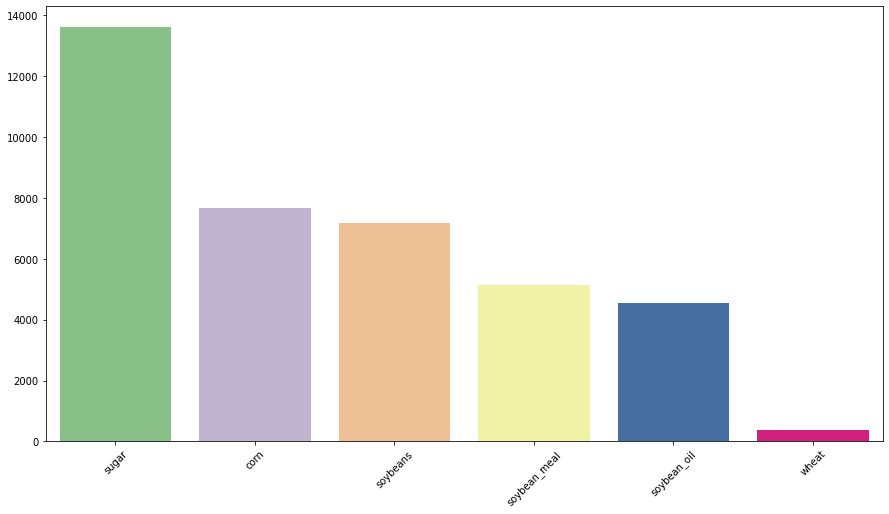

In [258]:
plt.figure(figsize=(15,8))
sns.barplot(data=data_5_anos, x=data_5_anos['product'].value_counts().keys(),
          y=data_5_anos['product'].value_counts().values, palette="Accent")
plt.xticks(rotation=45)

In [259]:
data_exp[data_exp['product']=='sugar'].groupby(data_exp['date'].dt.year).sum()['tons']
data_exp[data_exp['product']=='corn'].groupby(data_exp['date'].dt.year).sum()['tons']
data_exp[data_exp['product']=='soybeans'].groupby(data_exp['date'].dt.year).sum()['tons']

date
1997    8.195025e+06
1998    8.679492e+06
1999    8.096035e+06
2000    1.072512e+07
2001    1.448690e+07
2002    1.480649e+07
2003    1.839112e+07
2004    1.718609e+07
2005    2.206341e+07
2006    2.486963e+07
2007    2.366474e+07
2008    2.449940e+07
2009    2.856070e+07
2010    2.905343e+07
2011    3.297554e+07
2012    3.289181e+07
2013    4.279507e+07
2014    4.568718e+07
2015    5.430348e+07
2016    5.157381e+07
2017    6.800659e+07
2018    8.214744e+07
2019    7.030014e+07
Name: tons, dtype: float64

In [260]:
# Os 3 produtos mais Exportados nos ultimos 5 anos;
trace1 = go.Scatter(x = data_exp[data_exp['product']=='sugar'].groupby(data_exp['date'].dt.year).sum()['tons'].keys(),
                    y = data_exp[data_exp['product']=='sugar'].groupby(data_exp['date'].dt.year).sum()['tons'].values,
                    mode = 'markers+lines',
                    name = 'sugar')
# Gráfico de apenas linhas
trace2 = go.Scatter(x = data_exp[data_exp['product']=='corn'].groupby(data_exp['date'].dt.year).sum()['tons'].index,
                    y = data_exp[data_exp['product']=='corn'].groupby(data_exp['date'].dt.year).sum()['tons'].values,
                    mode = 'markers+lines',
                    name = 'corn')
# Criando gráfico com marcadores e linhas
trace3 = go.Scatter(x = data_exp[data_exp['product']=='soybeans'].groupby(data_exp['date'].dt.year).sum()['tons'].index,
                    y = data_exp[data_exp['product']=='soybeans'].groupby(data_exp['date'].dt.year).sum()['tons'].values,
                    mode = 'markers+lines',
                    name = 'soybeans')
layout = go.Layout(title = 'Evolução anual exportação dos 3 maiores produtos')
data = [trace1, trace2, trace3]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## 3- What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?

In [262]:
milho = data_5_anos[data_5_anos['product']=='corn']

Text(0.5, 1.0, 'Rota Exportação Milho')

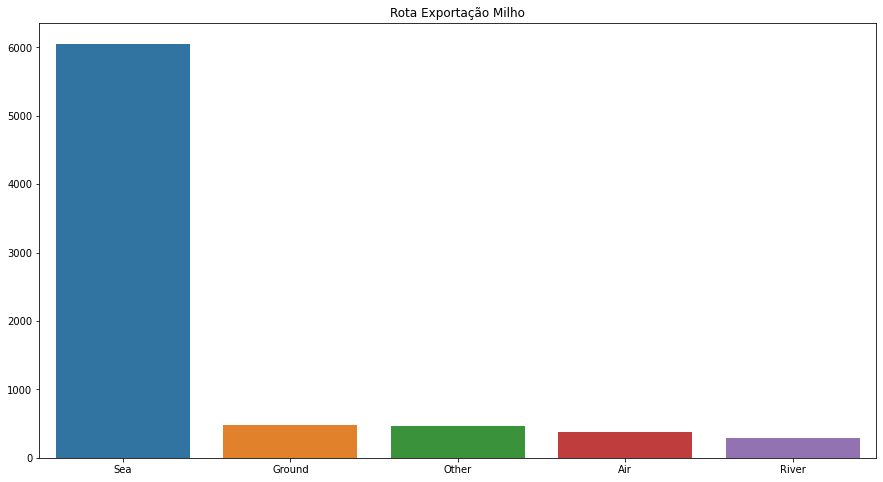

In [263]:
plt.figure(figsize=(15,8))
sns.barplot(data=milho, x=milho['route'].value_counts().keys(), 
            y=milho['route'].value_counts().values)
plt.title('Rota Exportação Milho')

In [264]:
#% dos outros produtos com relação ao tipo 
rotas = data_5_anos[['product', 'route', 'tons']].groupby(['product', 'route']).sum()

In [87]:
#rotas = rotas.reset_index()

In [266]:
rotas

tons
product      route               
corn         Air     1.015261e+04
             Ground  7.250953e+04
             Other   2.660552e+05
             River   5.869627e+06
             Sea     1.383810e+08
soybean_meal Air     2.202439e+04
             Ground  8.336698e+03
             Other   9.149716e+04
             River   1.974000e+02
             Sea     7.652543e+07
soybean_oil  Air     2.589000e+00
             Ground  1.299059e+05
             Other   2.413748e+04
             River   3.409907e+03
             Sea     6.553972e+06
soybeans     Air     5.389800e+01
             Ground  9.834405e+04
             Other   1.519021e+06
             River   8.566090e+06
             Sea     3.161480e+08
sugar        Air     3.017900e+01
             Ground  6.296318e+05
             Other   4.784887e+04
             River   4.678631e+04
             Sea     1.193094e+08
wheat        Air     1.059000e+00
             Ground  1.491142e+03
             Other   1.148200e+01
             Sea     3.884333e+06

Text(0.5, 1.0, 'wheat')

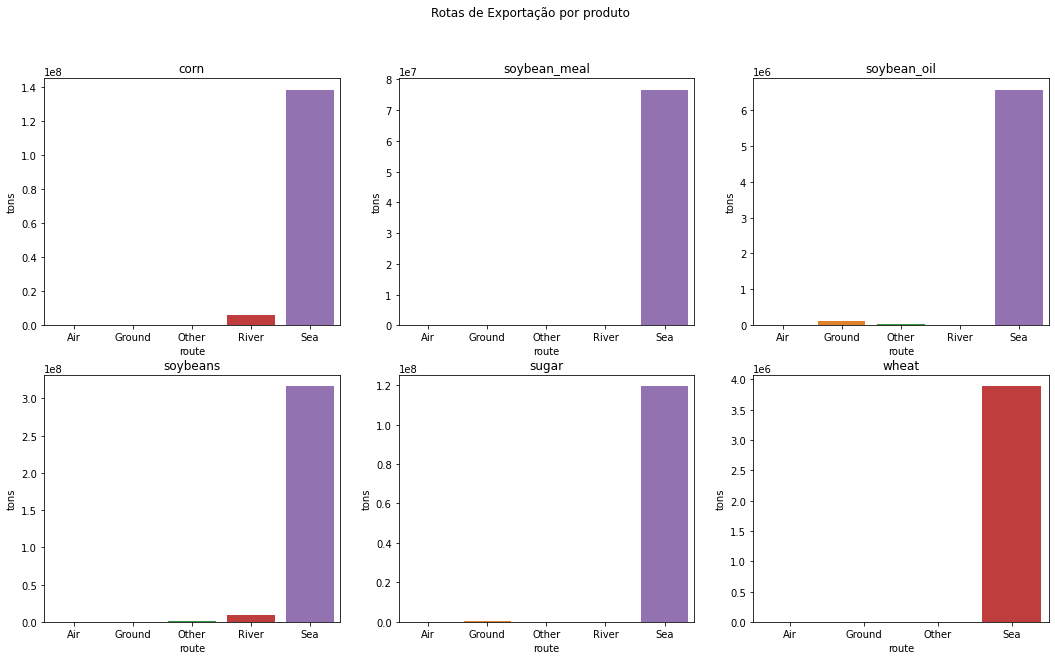

In [276]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Rotas de Exportação por produto')

sns.barplot(ax=axes[0, 0], data=rotas.loc[('corn')], x=rotas.loc[('corn')].index, 
            y=rotas.loc[('corn')]['tons'])
axes[0,0].set_title(produtos[0])

sns.barplot(ax=axes[0, 1], data=rotas.loc[('soybean_meal')], x=rotas.loc[('soybean_meal')].index, 
            y=rotas.loc[('soybean_meal')]['tons'])
axes[0,1].set_title(produtos[1])

sns.barplot(ax=axes[0, 2], data=rotas.loc[('soybean_oil')], x=rotas.loc[('soybean_oil')].index, 
            y=rotas.loc[('soybean_oil')]['tons'])
axes[0,2].set_title(produtos[2])

sns.barplot(ax=axes[1, 0], data=rotas.loc[('soybeans')], x=rotas.loc[('soybeans')].index, 
             y=rotas.loc[('soybeans')]['tons'])
axes[1,0].set_title(produtos[3])

sns.barplot(ax=axes[1, 1], data=rotas.loc[('sugar')], x=rotas.loc[('sugar')].index,  
             y=rotas.loc[('sugar')]['tons'])
axes[1,1].set_title(produtos[4])

sns.barplot(ax=axes[1, 2], data=rotas.loc[('wheat')], x=rotas.loc[('wheat')].index, 
             y=rotas.loc[('wheat')]['tons'])
axes[1,2].set_title(produtos[5])

Podemos observa que grande parte da exportação não importa o produto é feito pelo mar

4- Quais os países que têm sido os parceiros comerciais mais importantes do Brasil em termos de 'milho' e 'açúcar' nos últimos 3 anos?

In [281]:
ultimo_3_anos = data_exp[data_exp['date']>='2017-01-01']

In [283]:
milho_acucar_3_anos = ultimo_3_anos[(ultimo_3_anos['product']=='corn') | (ultimo_3_anos['product']=='sugar')] 

In [286]:
gb_sum = milho_acucar_3_anos.groupby('country').sum()

In [287]:
gb_sum.nlargest(10, 'tons', keep='all')

,tons,usd
country,,
Iran,1.785774e+07,3.302428e+09
Egypt,1.142502e+07,2.385649e+09
Japan,9.679768e+06,1.577629e+09
Bangladesh,9.560076e+06,2.591054e+09
Vietnam,9.456969e+06,1.555211e+09
Spain,8.377581e+06,1.387901e+09
Algeria,8.315540e+06,2.441462e+09
Malaysia,7.220061e+06,1.735365e+09
South Korea,6.287521e+06,1.036431e+09


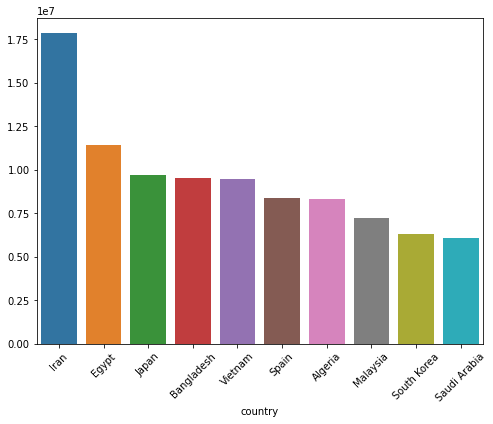

In [288]:
plt.figure(figsize=(8,6))
sns.barplot(data=gb_sum.nlargest(10, 'tons', keep='all'), 
            x=gb_sum.nlargest(10, 'tons', keep='all').index, 
            y=gb_sum.nlargest(10, 'tons', keep='all').tons.values)
plt.xticks(rotation=45);

5- Para cada um dos produtos no conjunto de dados, mostra os 5 estados mais importantes em termos de exportações?

In [289]:
 grupo = data_exp[['product', 'state', 'tons']].groupby(['product', 'state']).sum()

In [290]:
estados = []
for i in data_exp['product'].unique():
  estados.append(grupo.loc[(i)].nlargest(5, 'tons'))

In [291]:
produtos = data_exp['product'].unique()

estados[0].reset_index().state

0    MT
1    PR
2    GO
3    MS
4    SP
Name: state, dtype: object

Text(0.5, 1.0, 'Rota Exportação Milho')

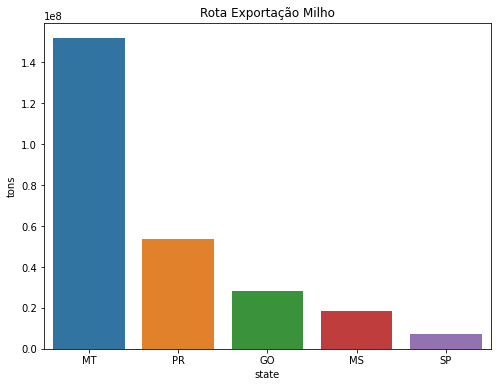

In [292]:
plt.figure(figsize=(8,6))
sns.barplot(data=estados[0].reset_index(), x=estados[0].reset_index().state, 
            y=estados[0].reset_index().tons)
plt.title('Rota Exportação Milho')

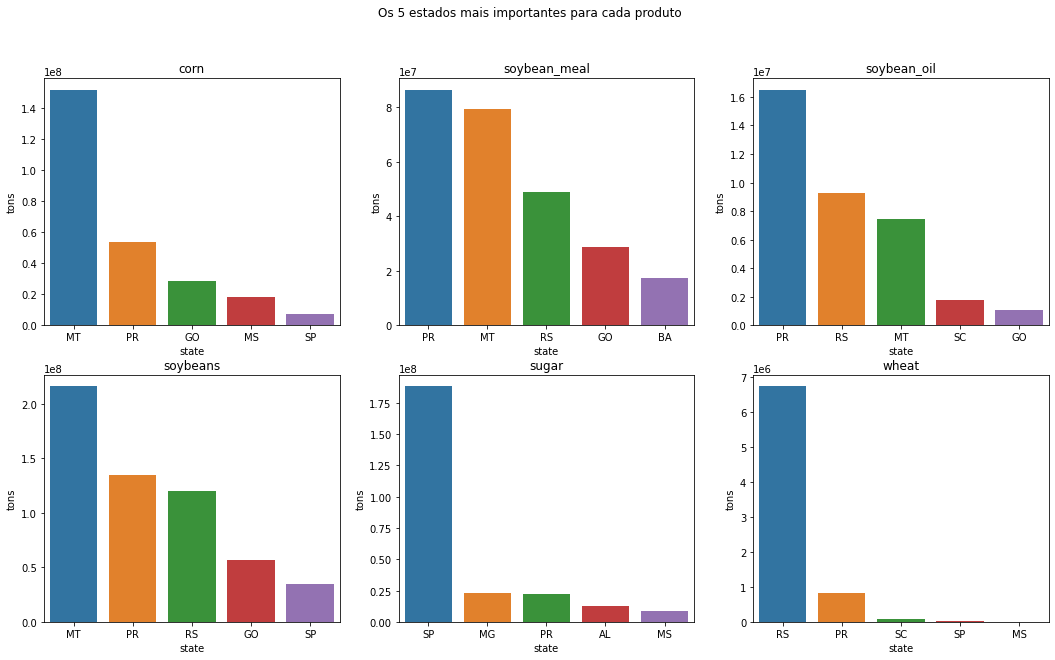

In [293]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Os 5 estados mais importantes para cada produto')

sns.barplot(ax=axes[0, 0], data=estados[0].reset_index(), x=estados[0].reset_index().state, 
            y=estados[0].reset_index().tons)
axes[0,0].set_title(produtos[0])

sns.barplot(ax=axes[0, 1], data=estados[1].reset_index(), x=estados[1].reset_index().state, 
            y=estados[1].reset_index().tons)
axes[0,1].set_title(produtos[1])

sns.barplot(ax=axes[0, 2], data=estados[2].reset_index(), x=estados[2].reset_index().state, 
            y=estados[2].reset_index().tons)
axes[0,2].set_title(produtos[2])

sns.barplot(ax=axes[1, 0], data=estados[3].reset_index(), x=estados[3].reset_index().state, 
            y=estados[3].reset_index().tons)
axes[1,0].set_title(produtos[3])

sns.barplot(ax=axes[1, 1], data=estados[4].reset_index(), x=estados[4].reset_index().state, 
            y=estados[4].reset_index().tons)
axes[1,1].set_title(produtos[4])

sns.barplot(ax=axes[1, 2], data=estados[5].reset_index(), x=estados[5].reset_index().state, 
            y=estados[5].reset_index().tons)
axes[1,2].set_title(produtos[5]);

6 - Agora, pedimos que você mostre suas habilidades de modelagem. Sinta-se à vontade para usar qualquer tipo de abordagem de modelagem, mas tenha em mente que a abordagem de modelagem depende da natureza de seus dados e, portanto, modelos diferentes geram estimativas e previsões diferentes. Para ajudá-lo nesta tarefa, também fornecemos um conjunto de dados de possíveis covariáveis ​​(.xlsx). Todos eles vêm de fontes públicas (FMI, Banco Mundial) e são apresentados em formato de número de índice. Pergunta: Qual deve ser o total brasileiro de soja, farelo de soja e projeções de exportação de milho, em toneladas, para os próximos 11 anos (2020-2030)? Estamos mais interessados ​​na previsão anual.

In [294]:
soybeans = data_exp[data_exp['product']=='soybeans']
corn = data_exp[data_exp['product']=='corn']
soybean_meal = data_exp[data_exp['product']=='soybean_meal']

In [295]:
soybeans['date'] = pd.DatetimeIndex(soybeans['date']).year
soybean_meal['date'] = pd.DatetimeIndex(soybean_meal['date']).year
corn['date'] = pd.DatetimeIndex(corn['date']).year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [296]:
y_soybeans = soybeans[['date', 'tons']].groupby('date').sum()
y_corn = corn[['date', 'tons']].groupby('date').sum()
y_soybean_meal  = soybean_meal[['date', 'tons']].groupby('date').sum()


In [297]:
#variaveis alvo toneladas
y_corn = y_corn.values
y_soybean_meal = y_soybean_meal.values
y_soybeans = y_soybeans.values

In [299]:
df = pd.read_excel('/content/covariates.xlsx')

In [343]:
X_teste_corn = X_teste.drop(['price_soybeans', 'price_soybean_meal'], axis=1)
X_teste_soybeans = X_teste.drop(['price_corn', 'price_soybean_meal'], axis=1)
X_teste_soybean_meal = X_teste.drop(['price_soybeans', 'price_corn'], axis=1)

In [302]:
apagar_inicio = df.loc[0:17]
apagar_final = df.loc[41:51]

In [303]:
X_treino = df.drop(apagar_inicio.index)
X_treino = X_treino.drop(apagar_final.index)

In [307]:
X_treino_corn = X_treino.drop(['price_soybeans', 'price_soybean_meal'], axis=1)
X_treino_soybeans = X_treino.drop(['price_corn', 'price_soybean_meal'], axis=1)
X_treino_soybean_meal = X_treino.drop(['price_soybeans', 'price_corn'], axis=1)

In [305]:
from sklearn.ensemble import RandomForestRegressor

In [326]:
def treino(X,y):
  rf = RandomForestRegressor()
  return rf.fit(X, y)
  

In [333]:
corn = treino(X_treino_corn, y_corn)
soybean_meal = treino(X_treino_soybean_meal, y_soybean_meal)
soybeans = treino(X_treino_soybeans, y_soybeans)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [341]:
corn.score(X_treino_corn, y_corn) , soybean_meal.score(X_treino_soybean_meal, y_soybean_meal), soybeans.score(X_treino_soybeans, y_soybeans)

(0.9686494336213881, 0.9748841223492494, 0.9925875384746892)

In [344]:
#previsão corn
y_pred_corn = corn.predict(X_teste_corn)

In [345]:
X_teste_corn['previsao_tons'] = y_pred_corn
X_teste_corn

,year,price_corn,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam,previsao_tons
41,2020,127.345508,3685.667312,169.949912,211.249225,225.919534,675.556744,379.328745,604.776444,201.141214,1240.856229,2.941878e+07
42,2021,130.855976,4024.748705,175.218360,217.586702,235.634074,716.765705,401.318974,621.710185,207.175450,1327.716165,3.311688e+07
43,2022,134.463215,4230.010888,181.266859,220.415329,238.697317,741.508301,415.172417,643.171485,208.832854,1395.429689,3.282577e+07
44,2023,138.169893,4441.511433,187.576609,223.721559,242.277776,767.319592,429.624226,665.559753,210.503517,1465.201174,3.300783e+07
45,2024,141.978752,4663.587005,194.212029,227.301104,246.154221,794.463105,444.821949,689.103567,212.187545,1538.461232,3.501386e+07
46,2025,145.892607,4892.102768,201.152295,231.278874,250.461920,822.853648,460.717888,713.729033,213.885045,1613.845833,3.456740e+07
47,2026,150.142281,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433,3.523781e+07
48,2027,154.391956,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713,3.523781e+07
49,2028,158.641630,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695,3.523781e+07
50,2029,162.891304,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405,3.523781e+07


In [346]:
#previsão soybean_meal
y_pred_soybean_meal = soybeans.predict(X_teste_soybean_meal)

In [347]:
X_teste_soybean_meal['previsao_tons'] = y_pred_soybean_meal
X_teste_soybean_meal

,year,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam,previsao_tons
41,2020,145.243944,3685.667312,169.949912,211.249225,225.919534,675.556744,379.328745,604.776444,201.141214,1240.856229,6.174926e+07
42,2021,148.695213,4024.748705,175.218360,217.586702,235.634074,716.765705,401.318974,621.710185,207.175450,1327.716165,6.767831e+07
43,2022,152.228491,4230.010888,181.266859,220.415329,238.697317,741.508301,415.172417,643.171485,208.832854,1395.429689,7.004405e+07
44,2023,155.845726,4441.511433,187.576609,223.721559,242.277776,767.319592,429.624226,665.559753,210.503517,1465.201174,7.105303e+07
45,2024,159.548913,4663.587005,194.212029,227.301104,246.154221,794.463105,444.821949,689.103567,212.187545,1538.461232,7.140027e+07
46,2025,163.340095,4892.102768,201.152295,231.278874,250.461920,822.853648,460.717888,713.729033,213.885045,1613.845833,7.140027e+07
47,2026,167.410250,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433,7.125885e+07
48,2027,171.480405,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713,7.125885e+07
49,2028,175.550560,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695,7.125885e+07
50,2029,179.620715,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405,7.125885e+07


In [348]:
#previsão soybeans
y_pred_soybeans = soybeans.predict(X_teste_soybeans)

In [349]:
X_teste_soybeans['previsao_tons'] = y_pred_soybeans
X_teste_soybeans

,year,price_soybeans,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam,previsao_tons
41,2020,116.920726,3685.667312,169.949912,211.249225,225.919534,675.556744,379.328745,604.776444,201.141214,1240.856229,6.290660e+07
42,2021,121.166259,4024.748705,175.218360,217.586702,235.634074,716.765705,401.318974,621.710185,207.175450,1327.716165,6.865233e+07
43,2022,125.565952,4230.010888,181.266859,220.415329,238.697317,741.508301,415.172417,643.171485,208.832854,1395.429689,7.110422e+07
44,2023,130.125404,4441.511433,187.576609,223.721559,242.277776,767.319592,429.624226,665.559753,210.503517,1465.201174,7.201611e+07
45,2024,134.850415,4663.587005,194.212029,227.301104,246.154221,794.463105,444.821949,689.103567,212.187545,1538.461232,7.191619e+07
46,2025,139.746996,4892.102768,201.152295,231.278874,250.461920,822.853648,460.717888,713.729033,213.885045,1613.845833,7.140027e+07
47,2026,145.203519,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433,7.125885e+07
48,2027,150.660041,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713,7.125885e+07
49,2028,156.116564,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695,7.125885e+07
50,2029,161.573086,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405,7.125885e+07


In [350]:
# Previsao de exportação do soybeans, soybean_meal, and corn
trace1 = go.Scatter(x = X_teste_corn['year'],
                    y = X_teste_corn['previsao_tons'],
                    mode = 'markers+lines',
                    name = 'corn')
# Gráfico de apenas linhas
trace2 = go.Scatter(x = X_teste_soybean_meal['year'],
                    y = X_teste_soybean_meal['previsao_tons'],
                    mode = 'markers+lines',
                    name = 'soybean_meal')
# Criando gráfico com marcadores e linhas
trace3 = go.Scatter(x = X_teste_soybeans['year'],
                    y = X_teste_soybeans['previsao_tons'],
                    mode = 'markers+lines',
                    name = 'soybeans')
layout = go.Layout(title = 'Previsão exportação Toneladas')
data = [trace1, trace2, trace3]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)